In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

stocks = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/stocks_2006.dta?raw=true')
stocks.name = "Stocks"

# convert to annual return and std deviation 
annual = pd.DataFrame() # open an empty dataframe
annual['ret'] = (stocks.assign(ret=stocks['ret']+1) # now we have R(t) for each observation
                       .groupby('permno')['ret']    # for each firm,
                       .prod()                      # multiple all the gross returns
                       -1                           # and subtract one to get back to the total period return
)
annual['std'] = stocks.groupby('permno')['ret'].std().mul(np.sqrt(250)) #times sqrt(250) to annualize
annual['year'] = stocks.groupby('permno')['date'].first().dt.year

# get firm information 
# this firm file is like prior, but includes more variables
# investing, financing, industry competition and more!
# VARIABLE DESCRIPTIONS IN README AT: https://github.com/LeDataSciFi/lectures-spr2020/tree/master/assignment_data
firms = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/firms_2006_fuller.dta?raw=true')
firms.name = "Firms"

# merge firm data with annualized stock data
firms = firms.merge(left_on=['lpermno','fyear'], 
            right=annual, right_on=['permno','year'],
            how='inner') 

# and this is a subsample of a few industrys and states
subsample = firms.query('state in ["CA","NY"] & gsector in ["40","45"]') 

In [3]:
firms.columns

Index(['gvkey', 'fyear', 'datadate', 'lpermno', 'gsector', 'sic', 'sic3',
       'age', 'tic', 'state', 'at', 'me', 'l_a', 'l_sale', 'prof_a', 'mb',
       'ppe_a', 'xrd_a', 'cash_a', 'div_d', 'td_a', 'td_mv', 'dltt_a', 'dv_a',
       'tnic3hhi', 'tnic3tsimm', 'prodmktfluid', 'delaycon', 'equitydelaycon',
       'debtdelaycon', 'privdelaycon', 'l_emp', 'l_ppent', 'l_laborratio',
       'ret', 'std', 'year'],
      dtype='object')

# This is a pair plot

/Users/mikestragapede/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mikestragapede/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


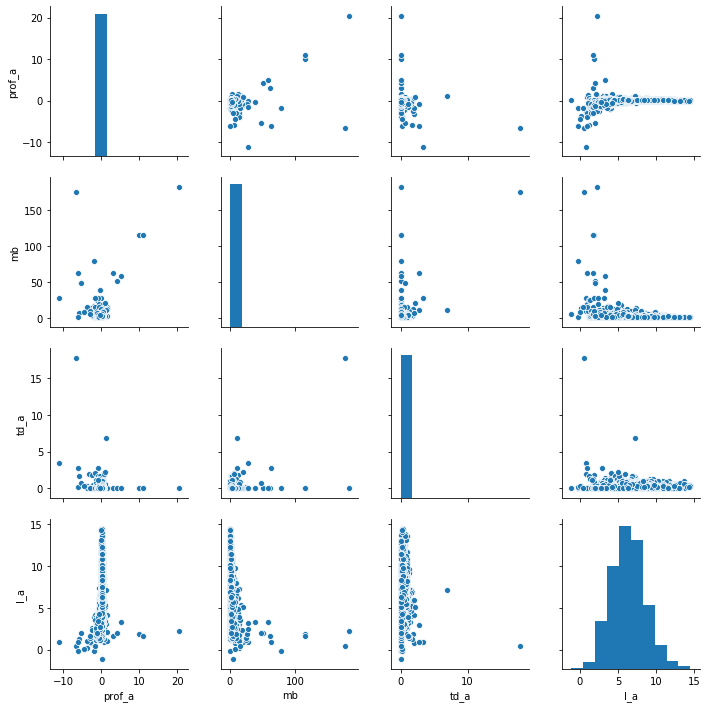

In [5]:
sns.pairplot(firms.filter(['prof_a','mb','td_a','l_a']))

# Exercise: Plot returns by industry 

Scatterplot GSector and Returns, and use the full sample (firms).

Question 1: What is your reaction to this?

Question 2: Choose a different graph type to improve it visually.

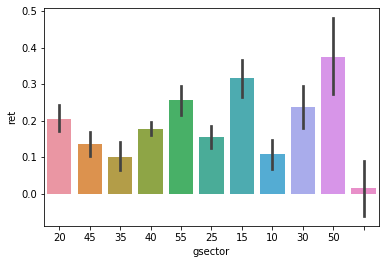

In [10]:
#sns.scatterplot(data=firms,x='gsector',y='ret')
sns.barplot(data=firms,x='gsector',y='ret')

# Exercise: Plot returns vs. risk 

Scatterplot Std and Returns, and use the subsample sample (subsample).

Question: How can this be improved?


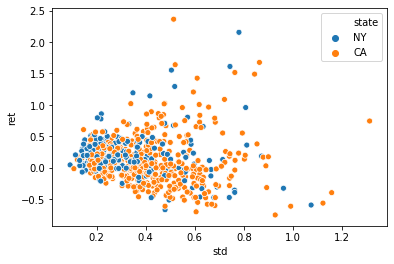

In [22]:
sns.scatterplot(data=subsample.query('std<2'), x='std',y='ret', hue='state')

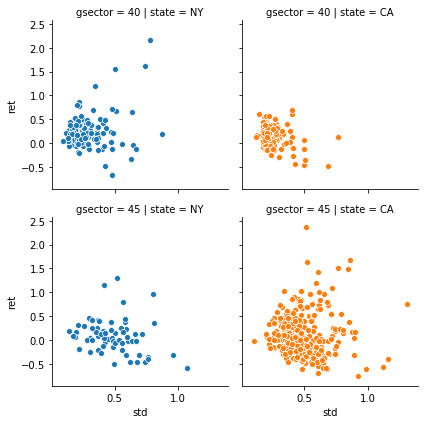

In [29]:
sns.FacetGrid(data=subsample.query('std<2'),row='gsector', col='state', hue='state').map(sns.scatterplot,'std','ret')

# Exercise: Plot average returns in the industry 

Use the full sample and plot the means as a bar chart.

Question: How can this be improved?

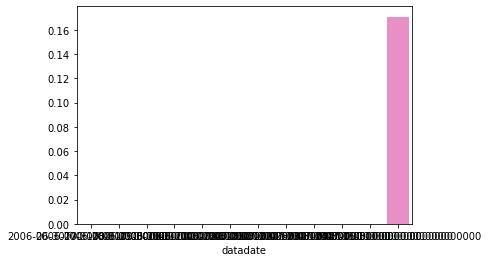

In [36]:
sns.barplot(data=firms,x='datadate',y=firms['ret'].mean())

In [37]:
firms.groupby('gsector')['ret'].mean() #shows the average return for each sector

gsector
      0.015656
10    0.109320
15    0.317207
20    0.205608
25    0.154182
30    0.237737
35    0.101500
40    0.177793
45    0.134563
50    0.375690
55    0.256223
Name: ret, dtype: float64

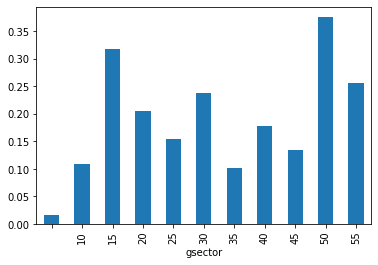

In [38]:
firms.groupby('gsector')['ret'].mean().plot.bar()